## Introduction

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position.
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system


__Problem Statement__ : We have a dataset consisting of several __independent__ variables and we need to __predict__ the __number of rental bikes__ <br>(__continous variable__) at a particular hour for a given particular day. So here __cnt__ is our __target__ variable.

__Variable description__ :-
<br>__instant__ : record index 
<br>__dteday__ : date 
<br>__season__ : season (1:springer, 2:summer, 3:fall, 4:winter)
<br>__yr__ : year (0: 2011, 1:2012) 
<br>__mnth__ : month ( 1 to 12) 
<br>__hr__ : hour (0 to 23) 
<br>__holiday__ : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule) 
<br>__weekday__ : day of the week 
<br>__workingday__ : if day is neither weekend nor holiday is 1, otherwise is 0. 
<br>__weathersit__: - __1__: Clear, Few clouds, Partly cloudy, Partly cloudy 
                <br>- __2__: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
                <br> - __3__: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
                <br> - __4__: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
<br>__temp__ : Normalized temperature in Celsius. The values are divided to 41 (max) 
<br>__atemp__ : Normalized feeling temperature in Celsius. The values are divided to 50 (max) 
<br>__hum__ : Normalized humidity. The values are divided to 100 (max) 
<br>__windspeed__ : Normalized wind speed. The values are divided to 67 (max) 
<br>__casual__ : count of casual users 
<br>__registered__ : count of registered users 
<br>__cnt__ : count of total rental bikes including both casual and registered (__target variable__)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import math

In [3]:
hour_dt = pd.read_csv("hour.csv",sep=',',index_col="instant")

In [4]:
hour_dt.head() # This provides the top 5 samples of our given dataset.

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
print("sample size of hour.csv data:",hour_dt.shape[0])
print("number of features in hour.csv data:",hour_dt.shape[1])

sample size of hour.csv data: 17379
number of features in hour.csv data: 16


## Data Analysis

In [6]:
print("data type summary for hour.csv:-")
hour_dt.dtypes

data type summary for hour.csv:-


dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Except for '__dteday__' variable all the variables are __numeric__ ,although some of them categorical but in __Encoded__ form.

In [7]:
num_var = ['temp','atemp','hum','windspeed','casual','registered']
fact_var = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']
print("the numerical variables are :",[str(x) for x in num_var])
print("the categorical variables are :",[str(x) for x in fact_var])

the numerical variables are : ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']
the categorical variables are : ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']


In [8]:
target = 'cnt'

In [9]:
print("check for null values:")
hour_dt.isnull().sum()

check for null values:


dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

__No variable__ with __NaN__ (__NULL__) value, hence data cleaning is not required.

In [10]:
print("Summary for numerical variables : ")
hour_dt[num_var].describe().transpose()

Summary for numerical variables : 


,count,mean,std,min,25%,50%,75%,max
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000
atemp,17379.0,0.475775,0.171850,0.00,0.3333,0.4848,0.6212,1.0000
hum,17379.0,0.627229,0.192930,0.00,0.4800,0.6300,0.7800,1.0000
windspeed,17379.0,0.190098,0.122340,0.00,0.1045,0.1940,0.2537,0.8507
casual,17379.0,35.676218,49.305030,0.00,4.0000,17.0000,48.0000,367.0000
registered,17379.0,153.786869,151.357286,0.00,34.0000,115.0000,220.0000,886.0000


__Data Analysis for Target Variable (cnt)__

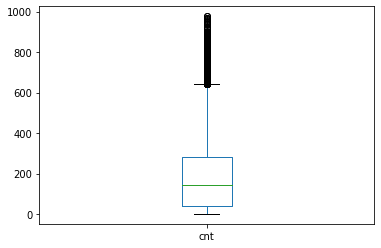

In [11]:
hour_dt['cnt'].plot.box()

In [12]:
hour_dt['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

__Comment__ : From the boxplot figure, the target variable has many outliers after 'cnt' value '600', <br> also the summary (__describe()__) shows that __mean__ and __median__ aren't close, hence __cnt__ is not __normal distribution__ . 

__Data Analysis for Independent Variables__

In [13]:
# Converting temperature 'temp' to categorical form based on quantile.
hour_dt['temp_c'] = [str('<='+str(hour_dt['temp'].quantile(0.25))) if c<=hour_dt['temp'].quantile(0.25) 
                    else str('<='+str(hour_dt['temp'].quantile(0.5))) if c<=hour_dt['temp'].quantile(0.5)
                    else str('<='+str(hour_dt['temp'].quantile(0.75))) if c<=hour_dt['temp'].quantile(0.75)
                    else str('>'+str(hour_dt['temp'].quantile(0.75))) for c in hour_dt['temp']]

In [14]:
hour_dt.groupby('temp_c')['cnt'].sum()

temp_c
<=0.34     465795
<=0.5      691027
<=0.66    1027577
>0.66     1108280
Name: cnt, dtype: int64

In [15]:
hour_dt.groupby('temp_c')['cnt'].mean()

temp_c
<=0.34     97.650943
<=0.5     168.955257
<=0.66    214.301773
>0.66     297.604726
Name: cnt, dtype: float64

__Comment:__ It is observed that as __temperature 'temp'__ increases, the number of rental bikes increases. Also the average count increases as temperature __rises__ .

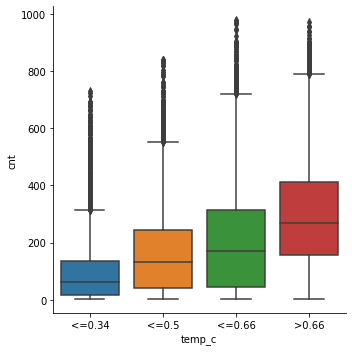

In [16]:
sns.catplot(x="temp_c", y="cnt", kind="box", data=hour_dt)

__Comment:__ It can be observed that __median (50th Percentile)__ of number of rental bikes is __higher__ incase of __Higher temperature__ .

In [17]:
# Converting humidity 'hum' to categorical form based on quantile.
hour_dt['hum_c'] = [str('<='+str(hour_dt['hum'].quantile(0.25))) if c<=hour_dt['hum'].quantile(0.25) 
                    else str('<='+str(hour_dt['hum'].quantile(0.5))) if c<=hour_dt['hum'].quantile(0.5)
                    else str('<='+str(hour_dt['hum'].quantile(0.75))) if c<=hour_dt['hum'].quantile(0.75)
                    else str('>'+str(hour_dt['hum'].quantile(0.75))) for c in hour_dt['hum']]

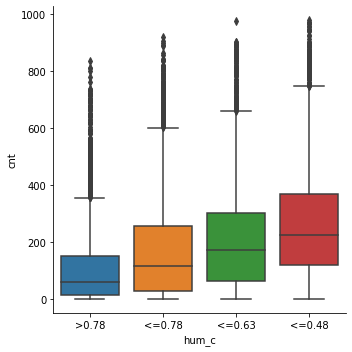

In [18]:
sns.catplot(x="hum_c", y="cnt", kind="box", data=hour_dt)

__Comment:__ It can be observed that median (50th Percentile) of number of rental bikes is __higher__ incase of __lower__ Humidity .

In [19]:
# Converting Wind Speed 'windspeed' to categorical form based on quantile.
hour_dt['windspeed_c'] = [str('<='+str(round(hour_dt['windspeed'].quantile(0.25),2))) if c<=hour_dt['windspeed'].quantile(0.25) 
                    else str('<='+str(round(hour_dt['windspeed'].quantile(0.5),2))) if c<=hour_dt['windspeed'].quantile(0.5)
                    else str('<='+str(round(hour_dt['windspeed'].quantile(0.75),2))) if c<=hour_dt['windspeed'].quantile(0.75)
                    else str('>'+str(round(hour_dt['windspeed'].quantile(0.75),2))) for c in hour_dt['windspeed']]

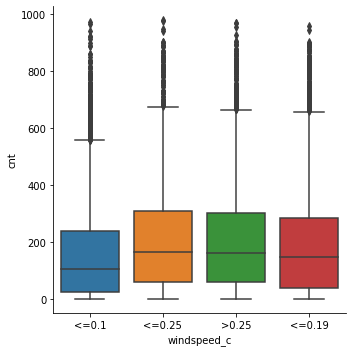

In [20]:
sns.catplot(x="windspeed_c", y="cnt", kind="box", data=hour_dt)

In [21]:
pd.DataFrame(hour_dt.groupby(['season','windspeed_c'])['cnt'].sum().reset_index(name="total_bikes")).sort_values('total_bikes',ascending=False)

,season,windspeed_c,total_bikes
9,3,<=0.19,333869
7,2,>0.25,293658
5,2,<=0.19,272723
8,3,<=0.1,271109
12,4,<=0.1,265343
13,4,<=0.19,246241
11,3,>0.25,232939
10,3,<=0.25,223212
15,4,>0.25,192640
4,2,<=0.1,185298


__Comment__ : It is observed that there large number of rental bikes booked during __Season 3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)__ and __Windspeed__ is between __0.1 - 0.19__ .
And lowest number of rental bikes booked during __Season 1(Clear, Few clouds, Partly cloudy, Partly cloudy)__ and __Windspeed__ is between __0.19 - 0.25__

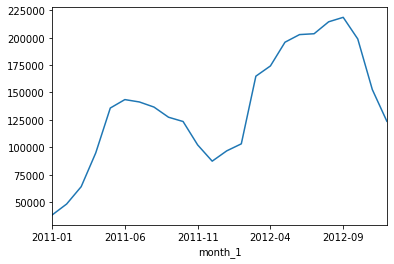

In [22]:
hour_dt['month_1'] = hour_dt['dteday'].apply(lambda x:x[:7])    #Getting Month-Year variable
month_wise = hour_dt.groupby('month_1')['cnt'].sum()
month_wise.plot()

__Comment:__ It is observed that the number of rented bikes increases from __January__ to __June__ for the __Year 2011__ and decreases gradually from __June__ to __December__.
<br> In case of __Year 2012__, the number of rented bikes increases from __January__ to __September__ and steeply decreases from __September__ to __December__ .

In [23]:
month_wise = hour_dt.groupby('month_1')['cnt'].sum().reset_index(name="total_bikes_in_a_month")

In [24]:
month_wise[month_wise['month_1'].str.contains('2011',regex = True)].sort_values('total_bikes_in_a_month',ascending=False)[0:3]

,month_1,total_bikes_in_a_month
5,2011-06,143512
6,2011-07,141341
7,2011-08,136691


In [25]:
month_wise[month_wise['month_1'].str.contains('2011',regex = True)].sort_values('total_bikes_in_a_month',ascending=True)[0:3]

,month_1,total_bikes_in_a_month
0,2011-01,38189
1,2011-02,48215
2,2011-03,64045


__Comment:__ It is observed that __June__ , __July__, __August__ has highest number of rented bikes in __Year 2011__ and 
<br> and __January__,__February__ and __March__ has lowest number of rented bikes in __Year 2011__.

In [26]:
month_wise[month_wise['month_1'].str.contains('2012',regex = True)].sort_values('total_bikes_in_a_month',ascending=False)[0:3]

,month_1,total_bikes_in_a_month
20,2012-09,218573
19,2012-08,214503
18,2012-07,203607


In [27]:
month_wise[month_wise['month_1'].str.contains('2012',regex = True)].sort_values('total_bikes_in_a_month',ascending=True)[0:3]

,month_1,total_bikes_in_a_month
12,2012-01,96744
13,2012-02,103137
23,2012-12,123713


__Comment:__ It is observed that __September__ , __August__, __July__ has highest number of rented bikes in __Year 2012__ and 
<br> and __January__,__February__ and __December__ has lowest number of rented bikes in __Year 2012__.

<br> This pattern of __year 2012__ looks __different__ from what we observe in __year 2011__ .

In [28]:
hour_wise_yr1 = pd.DataFrame(hour_dt[hour_dt['yr']==1].groupby('hr')['cnt'].sum())
hour_wise_yr2 = pd.DataFrame(hour_dt[hour_dt['yr']!=1].groupby('hr')['cnt'].sum())

In [29]:
hour_wise_yr = pd.concat([hour_wise_yr1,hour_wise_yr2],axis=1)
hour_wise_yr.columns = ['count_in_2011','count_in_2012']

In [30]:
hour_wise_yr

,count_in_2011,count_in_2012
hr,,
0,23590,15540
1,14606,9558
2,9691,6661
3,4733,3441
4,2611,1817
5,9104,5157
6,34331,20801
7,97241,56930
8,165534,95467


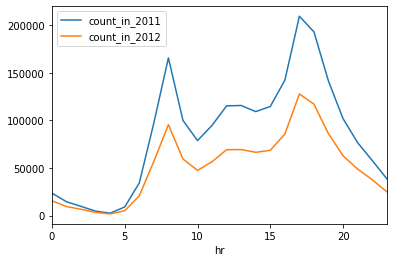

In [31]:
hour_wise_yr.plot()

__Comment:__ It can be observed that there are __higher number__ of rented bikes booking around __8 AM__ and __5 PM__, possibly because of __business time__, people leaving for their Offices and Schools at __8 AM__ and leaving for home at __5 PM__ for __both year 2011 and 2012.__
<br> Also, in both year, we observe there is __slight increase__ in number of rented bikes at __1 PM__ (maybe lunch time)
<br> We observe, the number of rented bikes decreases at __night (after 7 PM)__ and at __early morning (before 5 AM)__ for both year.

In [32]:
hour_dt.groupby('workingday').agg({'cnt': ['size','min','max','sum','mean', 'median','std']})

cnt                                                 
             size min  max      sum        mean median         std
workingday                                                        
0            5514   1  783  1000269  181.405332    119  172.853832
1           11865   1  977  2292410  193.207754    151  185.107477

__Comment:__ It can be observed that there are more observations for __workingday 1(Working Days)__  as compared to __Holidays or weekdays__ , the total number of rented bikes during __weekdays__ are __Twice__ that of __weekends__

In [33]:
hour_dt.groupby('weekday').agg({'cnt': ['size','min','max','sum','mean', 'median','std']})

cnt                                                
         size min  max     sum        mean median         std
weekday                                                      
0        2502   1  776  444027  177.468825    116  168.167710
1        2479   1  968  455503  183.744655    139  179.514167
2        2453   1  970  469109  191.238891    147  187.820480
3        2475   1  977  473048  191.130505    143  190.894464
4        2471   1  976  485395  196.436665    154  188.011923
5        2487   1  957  487790  196.135907    165  174.076894
6        2512   1  783  477807  190.209793    129  179.820569

__Comment:__ It can be observed that average number of rented bikes are __lowest__ on __Sunday__ (__Weekday 0__) and it is __highest__ for __Thursday and Friday__. 

## Prediction

In [34]:
hour_dt.drop(fact_var,axis=1).corr()  #Correlation matrix analysis for numerical variable with respect to each and most
                                        # importantly with 'cnt' (target) variable.

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.082321,0.506618,1.000000,0.972151
cnt,0.404772,0.400929,-0.322911,0.093234,0.694564,0.972151,1.000000


__Comment:__ It is observed that '__temp__' and '__atemp__' are highly collinear, 
<br> so this must be noted we must use either of them as both can't be included during development of predictive model. 
<br> Also, __'registered'__ is highly collinear with __'cnt'__, and '__casual__' is relatively collinear with '__cnt__'.
<br> In addition, both __'registered'__ and __'casual'__ are composed of __'cnt'__, therefore registered and casual can't be included for model development

__Comment:__ As we observed in earlier case, our __target variable__ 'cnt' doesn't have normal distribution, I am implementing __tree based non-linear Regression__ as we have to __predict number of rented bikes per hour 'cnt'__, which is a __continuous variable__, hence __regression__

In [35]:
# new numerical and categorical variable after removing registered and casual and choosing temp out of (temp and atemp).
num_var = ['temp','hum','windspeed']
fact_var = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']

In [36]:
# Importing necessary packages
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [37]:
Ind_var_list = num_var+fact_var
model_dt = hour_dt[Ind_var_list]
target = hour_dt['cnt']

In [38]:
# Creating train, validation and test data with 70-20-10 ratio.
X_train,X_valid_test,y_train,y_valid_test=train_test_split(model_dt,target,test_size=0.3,random_state=3)

In [39]:
X_valid,X_test,y_valid,y_test=train_test_split(X_valid_test,y_valid_test,test_size=0.33,random_state=3)

In [40]:
print("size of training data :",X_train.shape[0])
print("size of validation data :",X_valid.shape[0])
print("size of test data :",X_test.shape[0])

size of training data : 12165
size of validation data : 3493
size of test data : 1721


__Comment:__ 

The Key features of the Predictive Model are:

<br> The target variable is continuous, so I am implementing __Regression__.
<br> Since, we have 12k around train set and non-Normality of target variable I am implementing __Gradient Boosting Regressor__.

<br> __R2_Score__ is our metric to check we arrive at model with best performance, ideally __R2_Score__ should be 1 or near to 1 to get best performing model

In [41]:
gbm_reg=GradientBoostingRegressor()
gbm_model = gbm_reg.fit(X_train,y_train)
gbm_model_pred_train = gbm_model.predict(X_train)
gbm_model_pred_vaild = gbm_model.predict(X_valid)

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, gbm_model_pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, gbm_model_pred_train)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, gbm_model_pred_train)))
metrics.r2_score(y_train, gbm_model_pred_train)

Mean Absolute Error: 46.722832346545864
Mean Squared Error: 4647.76680650582
Root Mean Squared Error: 68.17453194929774


0.859563510378824

In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, gbm_model_pred_vaild))  
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, gbm_model_pred_vaild)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, gbm_model_pred_vaild)))
metrics.r2_score(y_valid, gbm_model_pred_vaild)

Mean Absolute Error: 46.70393662602819
Mean Squared Error: 4660.430251884059
Root Mean Squared Error: 68.26734396388993


0.8529795921615508

__Comment:__ In our first case of GBM Regressor(having default hyperparameter), we get nearly equal __R2 score__ (~0.85) for train and validation dataset, now we will tune one of the Hyperparameters and check whether __R2_score__ improves for not.

In [44]:
gbm_model.get_params   #View of Hyperparameters 

<bound method BaseEstimator.get_params of GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)>

In [45]:
gbm_reg=GradientBoostingRegressor(n_estimators=120)    # Have chosen to tune the n_estimators (number of iterations)
gbm_model = gbm_reg.fit(X_train,y_train)
gbm_model_pred_train = gbm_model.predict(X_train)
gbm_model_pred_vaild = gbm_model.predict(X_valid)

__Comment:__ We can create a grid with respect to __n_estimators and __learning_rate__ and pick up the best case using Grid Search over the GBM Model where __R2 score__ for __Training and Validation data__ are near to __1__ and close to each other, if difference between __R2 score__ of __Training and Validation data__ is high even if __R2 score__ of __Training Data__ is more closer to 1 , we end up in __Overfitting__ scenario.

In [46]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, gbm_model_pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, gbm_model_pred_train)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, gbm_model_pred_train)))
metrics.r2_score(y_train, gbm_model_pred_train)

Mean Absolute Error: 43.907479556731126
Mean Squared Error: 4085.6745381177784
Root Mean Squared Error: 63.919281426794676


0.8765476380904649

In [47]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_valid, gbm_model_pred_vaild))  
print('Mean Squared Error:', metrics.mean_squared_error(y_valid, gbm_model_pred_vaild)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_valid, gbm_model_pred_vaild)))
metrics.r2_score(y_valid, gbm_model_pred_vaild)

Mean Absolute Error: 44.0285558339131
Mean Squared Error: 4154.042725454961
Root Mean Squared Error: 64.45186363058062


0.8689543620081357

__Comment:__ the __R2 score__ has increased to 0.87 and 0.86 in train and validation respectively as we changed the hyperparameter n_estimator from 100 to 120. Hence we will construct variable importance of this model and perform prediction on test data.

In [48]:
df_imp_vars_DecisionTreeReg_v1 = pd.DataFrame(([X_train.columns,gbm_model.feature_importances_])).T
df_imp_vars_DecisionTreeReg_v1.columns = ['col_name','variable_importance']
df_imp_vars_DecisionTreeReg_v1 = df_imp_vars_DecisionTreeReg_v1.sort_values(by=['variable_importance'],ascending=False)
df_imp_vars_DecisionTreeReg_v1['variable_importance_perc'] = df_imp_vars_DecisionTreeReg_v1['variable_importance'].apply(lambda x : round(x*100,1))
df_imp_vars_DecisionTreeReg_v1

,col_name,variable_importance,variable_importance_perc
6,hr,0.608626,60.9
0,temp,0.126577,12.7
9,workingday,0.105492,10.5
4,yr,0.0874452,8.7
3,season,0.025908,2.6
1,hum,0.0215315,2.2
10,weathersit,0.010894,1.1
5,mnth,0.00812498,0.8
8,weekday,0.00366591,0.4
2,windspeed,0.00120769,0.1


## Restitution
As per the Gradient Boosting Model, we have __Hour, Temperature and Working Day__ as __Top 3 Predictors__ . 
This result corresponds to the __high impact of the hour and temperature__ variable with the number of rented bikes per hour in our problem case.
<br> for further iterations we should consider predictors having __Variable Importance__ more than __1 Percent__ 

In [49]:
#Checking our model on Test Data.
gbm_model_pred_test = gbm_model.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, gbm_model_pred_test))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, gbm_model_pred_test)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, gbm_model_pred_test)))
metrics.r2_score(y_test, gbm_model_pred_test)

Mean Absolute Error: 45.54816027335444
Mean Squared Error: 4423.246273353105
Root Mean Squared Error: 66.50749035524574


0.8695507054547271

__Comment:__ Since, our Test Data when predicted with our GBM model, has __R2 Score__ of __0.86__ very close to that of our __Tranining and Validation R2_Score__, so we created a stable model to predict __Number of Rented Bikes per hour__ 

<br> Following are some improvement tasks which can be implemented.
<br> 1) We can implement other ensemble methods or tree based Regression like Decision Tree, Random Forest, AdaBoost to check if can achieve __R2 Score__ more than 0.87 or closer to 1 (more closer to 1 better is our model). 
<br> 2) Log Transformation of target variable to reduce outliers and getting close to a normal distribution, by which we can implement __Linear Regression__ and check whether the model performance __improves or not__.
<br> 3) We can include historical variable like Registered to Casual ratio for a particular hr of __previous day__ and feed to the model along with the existing input variables and check whether metric of historical value plays any role or not.